## Scientific Question: How does gene expression levels of: COL11A1, COL10A1, CLDN8 and MMP11 vary between normal breast tissue of middle eastern women at ages >55 and tumor tissue of middle eastern women at ages >55 who have developed breast cancer?

Collagen type X1 alpha 1 chain (COL11A1) is found on chromosome 1 and functions in maintaining the structure of the extracellular matrix of macrophage, neutrophil and dendritic cells (Zheng et al., 2021). Col11A11 combines with pro-alpha 2(XI) and pro-alpha1(II) to form a triple stranded procollagen moleucle in order to create mature collagen. Collagen molecules provide structure and strength to connection tissues that suppor the body's muscles, joints, organs and skin (MedlinePlus 2020). 

The gene expression levels for the middle eastern women >55 with and without breast cancer was found from the NCBI GEO database (https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE29044). As stated on the databases website: "GEO (Gene Expression Omnibus) is a public functional genomics data repository supporting MIAME-compliant data submissions. Array- and sequence-based data are accepted. Tools are provided to help users query and download experiments and curated gene expression profiles."

## Scientific Hypothesis: If we analyze gene expression in the normal tissue in middle eastern women at ages >55 compared to breast cancer tissue of middle eastern women at ages >55, then we will find COL11A1, COL10A1, CLDN8 and MMP11 to be upregulated in breast cancer tissue



To obtain the dataset for my analyses on gene expression levels of breast tumors, there was a series matrix file (txt format) containing complete coverage of the Affymetrix Human Genome U122 Plus 2.0 array. The txt file was then imported to excel where I isolated only the rows containing gene expression profiles for Middle Eastern Women at ages >55 with normal breast tissue and breast cancer tumor tissue. I then saved the data as a csv file and read the data in Jupyter as a Pandas Dataframe for the first bioinformatics analyses, RNAseq.

RNA sequencing is the process of sequencing RNA in order to tell us which genes are differentially expressed in a cell. P-values will also be calculated in order to tell us the most significant differentially expressed genes amongst the target population. 

Hierarchical clustering will also be performed as a plotting method for all of the genes in the csv file. This will tell us which genes are most similiar to each other. Specifically, we can look to see if the most differentially expressed genes from RNA seq are closely related which can tell us more about gene-gene interaction and its contribution to developing breast cancer. 

The second plotting method will be a heat map of the top 5 most differentially expressed genes amongst our sample. A heat map will tell us the magnitude of how these genes are expressed in Middle Eastern women >55 with normal breast tissue and with cancerous tumor tissue. 

To obtain the dataset for my final analysis, pairwise sequence analysis, I went to the NCBI nucleotide database where I did a nucleotide BLAST for the most differentially expressed gene that appeared from my RNA seq analysis which was the gene: COL11A1 specifically in humans. I then found homologs of the COL11A1 gene specifically in chimpanzees. I downloaded the FASTA gene sequence file for COL11A1 in humans and in chimpanzees.

For the final analyses, I chose one gene of interest: COL11A1 that is also present in Chimpanzees and performed a pairwise sequence analysis in order to compare the nucleotide sequence of COL1A1 in humans versus in chimpanzees. Pairwise sequence analysis compares the two sequences and  shows which nucleotide bases are different from one another in the specified gene sequence. This can tell us how the sequences vary between one another and if there are any conserved sequences within the gene which may play an important role in gene expression. 


# Part 1: Load the Packages 

- pandas: Pandas is a package that allows users to perform real data analysis. The data sets used can labeled, numerical, or time series. The data sets can be easily manipulated under Python. More info can be found here: https://pandas.pydata.org/
- numpy: NumPy is a package that allows users to compute multidimensional array objects, masked arrays, and matrices. NumPy can also perform other operations such as shape manipulation, sorting, selection, linear algebra, statistical operations and random stimulation. Array objects compute n-dimensional arrays of the same data type. More info can be found here: https://numpy.org/doc/stable/user/whatisnumpy.html
- matplotlib.pyplot: Matplotlib is a package that can be imported in Python for plotting data in an animated, interactive, and stylish format. The figures generated make it easy for users to visualize their data and make inferences. Pyplot is a specific interface in matplotlib with added features such as scatterplots, colormaps, customization of axes, etc. More info can be found here: https://matplotlib.org/3.5.1/api/pyplot_summary.html
- collections: This library provides additional containers to Python such as: namedtuple, deque, ChainMap, Counter, OrderedDict, defaultdict, UserDict, UserList, and UserString. A container is essentially an object that allows you to store different objects allowing for easy access to the contained objects. More info on the function of these specialized containers can be found here: https://docs.python.org/3/library/collections.html
- scipy: This package is an extension to the NumPy package. I specifically imported the stats sub-package of scipy which provides the user with numerous statistical functions that work with continuous random variables and discrete random variables. More info can be found here: https://docs.scipy.org/doc/scipy/tutorial/stats.html
- statsmodels.sandbox.stats.multicomp: This package import functions that allows useres to curate numerous different statistcal models, stastistical tests, and statistical data exploration. I imported the multiple tests sub-package which gives test results and p-values for multiple tests. More info can be found here:https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html
- Bio SeqIO and Seq: the SeqIO subpackage was imported from biopython. The function of this package is to allow users to input and output a variety of sequence file formats for pairwise sequence alignment and multiple sequence alignments. For my dataset, I used this function to import my FASTA file from the NCBI nucleotide database in order to perform pairwise sequence analysis. The Seq object then serves to provide a number of string like methods with an alphabet property. For my purposes, I used the seq function to isolate the human gene sequence adn chimpanzee gene sequence from the FASTA file. More info can be found here: https://biopython.org/wiki/SeqIO and https://biopython.org/docs/1.75/api/Bio.Seq.html#:~:text=The%20Seq%20object%20provides%20a,an%20Alphabet%20class%20from%20Bio.
- Bio pairwise 2 and format_alignment: The pairwise 2 module is used to get global and local alignments between two sequences. This will help to find the best match between all charachters in two sequences and can give a positive score based on the matches. I used this module in order to perform my pairwise sequence analysis. The format_alignment function shows only the aligned parts of the sequences with the starting positions. This is useful for my purposes because the genes I am comparing are so large and take up a lot of space. More info can be found here: https://biopython.org/docs/1.75/api/Bio.pairwise2.html

In [75]:
#import required libraries
import pandas as pd
import collections
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats 
from statsmodels.sandbox.stats.multicomp import multipletests 
import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

# Part 2A: Load the data and perform Bioinformatics Analyses (RNAseq)

A CSV file is a Comma Seperated Values file that is a commonly used format for encapsulating spreadsheets and databases. 
The 'expression' csv file for this analysis is a spreadsheet where each column (e.g. GSM719634) refers to a middle eastern woman over the age of 55 who has normal tissue or has breast cancer tissue. Each row is labeled with an 'ID_REF' which references a probe associated with the gene being measured. 
A 'metadata' csv file was a spreadsheet created by me which sorts each column into middle eastern women with normal tissue and middle eastern women with tumor tissue. I can then use this metadata file to set the index to be associated with the condition of each of the middle eastern women.  
For this analysis, I will be calculating the p-values of my data in order to determine the most differentially expressed genes between normal tissue and breast cancer tissue. These genes should be of significant value meaning that the difference in gene expression level was not due to chance. 

In [83]:
# Processing the counts data
# Read in the csv file
Expression=pd.read_csv('GSE29044_Expression.csv')
#Read in the metadata
metadata=pd.read_csv('GSE29044_MetaData.csv')
print(Expression)
print(metadata)
#set index of metadata to id 
metadata=metadata.set_index('id')

                ID_REF               GSM719634              GSM719636  \
0            1007_s_at 10.02289999999999992042 9.47738000000000013756   
1              1053_at  5.62305999999999972516 6.91530999999999984595   
2               117_at  3.96715000000000017621 4.97700999999999993406   
3               121_at  5.64275000000000037659 5.92333999999999960551   
4            1255_g_at  2.47150999999999987367 2.55385999999999979693   
...                ...                     ...                    ...   
54670   AFFX-ThrX-5_at  5.23916000000000003922 8.21519999999999939178   
54671   AFFX-ThrX-M_at  6.97703999999999968651 9.14258000000000059515   
54672  AFFX-TrpnX-3_at  2.41100000000000003197 2.44905999999999979266   
54673  AFFX-TrpnX-5_at  2.33929000000000009152 2.36758999999999986130   
54674  AFFX-TrpnX-M_at  2.28689000000000008939 2.32054999999999989058   

                   GSM719637              GSM719639              GSM719641  \
0     9.83619999999999983231 9.34894000000000

In [84]:
#parse pd df for normal tissue samples
Normal_55=list(metadata.loc[metadata['condition']=='normal_55'].index)
print(Normal_55)

#parse pd df for tumor tissue samples
Tumor_55=list(metadata.loc[metadata['condition']=='tumor_55'].index)
print(Tumor_55)                        

['GSM719634', 'GSM719636', 'GSM719637', 'GSM719639', 'GSM719641']
['GSM719645', 'GSM719646', 'GSM719647', 'GSM719648', 'GSM719650']


In [85]:
#add column that contains sum of expression levels for each condition 
Expression['Sum Normal']=Expression[Normal_55].sum(axis=1)
Expression['Sum Tumor']=Expression[Tumor_55].sum(axis=1)
print(Expression.head())
#calculate mean and standard deviation for p-value analysis
Expression['Mean Normal']=Expression[Normal_55].mean(axis=1)
Expression['Mean Tumor']=Expression[Tumor_55].mean(axis=1)

Expression['STD Normal']=Expression[Normal_55].mean(axis=1)
Expression['STD Tumor']=Expression[Tumor_55].mean(axis=1)

      ID_REF               GSM719634              GSM719636  \
0  1007_s_at 10.02289999999999992042 9.47738000000000013756   
1    1053_at  5.62305999999999972516 6.91530999999999984595   
2     117_at  3.96715000000000017621 4.97700999999999993406   
3     121_at  5.64275000000000037659 5.92333999999999960551   
4  1255_g_at  2.47150999999999987367 2.55385999999999979693   

               GSM719637              GSM719639              GSM719641  \
0 9.83619999999999983231 9.34894000000000069406 9.01434000000000068553   
1 6.21696000000000026375 6.73601000000000027512 6.45234000000000040842   
2 3.11216999999999988091 2.88910000000000000142 4.03875999999999990564   
3 5.96171000000000006480 5.38455999999999956884 5.59883000000000041751   
4 2.49705999999999983530 2.49338000000000015177 2.48687000000000013600   

               GSM719645               GSM719646              GSM719647  \
0 9.52439999999999997726 10.06320000000000014495 9.40437000000000011823   
1 7.16784999999999961062  

In [86]:
#add row that contains sum of each column to df 
Sum_Dict={'ID_REF':'total Column Count',
          'GSM719634':Expression['GSM719634'].sum(),
          'GSM719636':Expression['GSM719636'].sum(),
          'GSM719637':Expression['GSM719637'].sum(),
          'GSM719639':Expression['GSM719639'].sum(),
          'GSM719641':Expression['GSM719641'].sum(),
          'GSM719645':Expression['GSM719645'].sum(),
          'GSM719646':Expression['GSM719646'].sum(),
          'GSM719647':Expression['GSM719647'].sum(),
          'GSM719648':Expression['GSM719648'].sum(),
          'GSM719650':Expression['GSM719650'].sum(),
          'Sum Normal':Expression['Sum Normal'].sum(),
          'Sum Tumor':Expression['Sum Tumor'].sum()
         }
Expression=Expression.append(Sum_Dict,ignore_index=True)
#change index to gene id
Expression=Expression.set_index('ID_REF')
print(Expression)

                                     GSM719634                   GSM719636  \
ID_REF                                                                       
1007_s_at              10.02289999999999992042      9.47738000000000013756   
1053_at                 5.62305999999999972516      6.91530999999999984595   
117_at                  3.96715000000000017621      4.97700999999999993406   
121_at                  5.64275000000000037659      5.92333999999999960551   
1255_g_at               2.47150999999999987367      2.55385999999999979693   
...                                        ...                         ...   
AFFX-ThrX-M_at          6.97703999999999968651      9.14258000000000059515   
AFFX-TrpnX-3_at         2.41100000000000003197      2.44905999999999979266   
AFFX-TrpnX-5_at         2.33929000000000009152      2.36758999999999986130   
AFFX-TrpnX-M_at         2.28689000000000008939      2.32054999999999989058   
total Column Count 243778.91620000000693835318 239450.1804199999

In [87]:
#calculate p-value of each gene using lambda function
Expression['p-value']=Expression.apply(lambda x:stats.ttest_ind_from_stats(x['Mean Normal'],x['STD Normal'],x['Sum Normal'],x['Mean Tumor'],x['STD Tumor'],x['Sum Tumor'])[1],axis=1)
print(Expression.head())

                        GSM719634              GSM719636  \
ID_REF                                                     
1007_s_at 10.02289999999999992042 9.47738000000000013756   
1053_at    5.62305999999999972516 6.91530999999999984595   
117_at     3.96715000000000017621 4.97700999999999993406   
121_at     5.64275000000000037659 5.92333999999999960551   
1255_g_at  2.47150999999999987367 2.55385999999999979693   

                       GSM719637              GSM719639  \
ID_REF                                                    
1007_s_at 9.83619999999999983231 9.34894000000000069406   
1053_at   6.21696000000000026375 6.73601000000000027512   
117_at    3.11216999999999988091 2.88910000000000000142   
121_at    5.96171000000000006480 5.38455999999999956884   
1255_g_at 2.49705999999999983530 2.49338000000000015177   

                       GSM719641              GSM719645  \
ID_REF                                                    
1007_s_at 9.01434000000000068553 9.524399999999

In [88]:
#calculate adjusted p-value for gene expression levels 
pd.set_option('display.float_format',lambda x:'%.20f'% x)
Expression['adjusted-p-value']=multipletests(Expression['p-value'],alpha=.05,method='bonferroni')[1]
print(Expression)

                                     GSM719634                   GSM719636  \
ID_REF                                                                       
1007_s_at              10.02289999999999992042      9.47738000000000013756   
1053_at                 5.62305999999999972516      6.91530999999999984595   
117_at                  3.96715000000000017621      4.97700999999999993406   
121_at                  5.64275000000000037659      5.92333999999999960551   
1255_g_at               2.47150999999999987367      2.55385999999999979693   
...                                        ...                         ...   
AFFX-ThrX-M_at          6.97703999999999968651      9.14258000000000059515   
AFFX-TrpnX-3_at         2.41100000000000003197      2.44905999999999979266   
AFFX-TrpnX-5_at         2.33929000000000009152      2.36758999999999986130   
AFFX-TrpnX-M_at         2.28689000000000008939      2.32054999999999989058   
total Column Count 243778.91620000000693835318 239450.1804199999

In [89]:
#reorder pd df from lowest to highest p-values
Expression=Expression.sort_values(by=['p-value'])
print(Expression)

                                     GSM719634                   GSM719636  \
ID_REF                                                                       
37892_at                2.60865999999999997883      6.38283999999999984709   
204320_at               2.77321999999999979636      7.06693000000000015604   
205941_s_at             2.39448000000000016385      3.60884999999999989129   
214598_at               8.79978999999999977888     10.34409999999999918430   
203878_s_at             4.00363999999999986557      4.50792000000000037119   
...                                        ...                         ...   
1557029_at              2.18486000000000002430      2.20659999999999989484   
1559124_at              2.43629000000000006665      2.47157999999999988816   
1552925_at              2.33619999999999983231      2.38822000000000000952   
203516_at               5.77308999999999983288      5.31308999999999986841   
total Column Count 243778.91620000000693835318 239450.1804199999

## Genes most differentially expressed in tumor tissues of middle eastern women >55 
ID_REF
- 37892_at = COL11A1 - Collagen Type X1 Alpha 1 Chain 
- 204320_at = COL11A1 - Collagen Type X1 Alpha 1 Chain 
- 205941_s_at = COL10A1 - Collagen Type X Alpha 1 Chain 
- 214598_at = CLDN8 - Claudin-8
- 203878_s_at= MMP11 - matrix metallopeptidase 1 

## Part 2B Load the data and perform Bioinformatics Analyses (Pairwise Seq)

A FASTA file is a file used to store sequence data. It can store nucleotide and protein sequences. The nucleotide sequences are represented using nucleotide base acronyms: A, T, C and G. The protein sequences are presented using the amino acid one letter acronymns.
For this analysis, I read in the FASTA file for COL11A1 gene in humans and in chimpanzees which was obtained from the NCBI nucleotide databse. I then isolated only the nucleotide sequences for both humans and chimpanzees in order to perform pairwise sequence analysis. The analysis will show which nucleotide bases are different between the two sequences and give a positive score based on the results. A +1 represents a match in nucleotide bases and a 0 represent no match. 

In [90]:
# Define the human gene and chimpanzee gene based on the txt file downloaded from NCBI
for Human_gene in SeqIO.parse("humangene.fna","fasta"):
    print(Human_gene.id)
    print(repr(Human_gene.seq))
    print(len(Human_gene))
for Chimp_gene in SeqIO.parse("Chimp_gene.fna","fasta"):
    print(Chimp_gene.id)
    print(repr(Chimp_gene.seq))
    print(len(Chimp_gene))

NC_000001.11:c103108580-102876473
Seq('GGGAGCAGGGAGGGGAGTGGGCGGAGGAGGGGGCTGCCCGGAGCCACTCGTCCA...CTA')
232108
NC_036879.1:c101923045-101691200
Seq('CAGCCTGCTTGTCAGTTTCGCCCTGGGTGGGGGAGCTGGGAGCAGGGAGGGGAG...CTA')
231846


In [91]:
#finding alignment similarities
#initiate an empty numpy matrix that is the length of the human gene fasta file 
alignments_score=np.empty(shape=(size_human,size_human))

#nested for loop to do pairwise sequence alignment for Human gene and chimp gene sequence
def pairwise_seq(my_numpy_array,size):
    #loop over human gene 
    for i in range(size_human):
        #loop over chimp gene
        for j in range(size_human):
            #define two sequences to be aligned
            X=repr(Human_gene.seq)
            Y=repr(Chimp_gene.seq)
            
        #get a list of global alignments between the two sequences 
        #no parameters. Identical characters have score of 1, else 0 
        #no gap penalties
            my_numpy_array[i,j]=int(pairwise2.align.globalxx(X,Y,score_only=True))
            print(pairwise2.align.globalxx(X,Y))
            
        return my_numpy_array
#check that for loop correctly created the matrix
My_alignment_Scores=pairwise_seq(alignments_score,size_human)
print(My_alignment_Scores)

[Alignment(seqA="Seq('GGGAGCAG---G---G--AG----G----GGAGTGGGCGGAGGAG--GGG-GCT-GCCCGGAGCCACTCGTCC--A-...CTA')", seqB="Seq('-----CAGCCTGCTTGTCAGTTTCGCCCTGG-GT--G-GG-GGAGCTGGGAGC-AG---GGAG------G---GGAG...CTA')", score=44.0, start=0, end=90), Alignment(seqA="Seq('GGG-AGCAG--G---G--AG----G----GGAGTGGGCGGAGGAG--GGG-GCT-GCCCGGAGCCACTCGTCC--A-...CTA')", seqB="Seq('---CAGC--CTGCTTGTCAGTTTCGCCCTGG-GT--G-GG-GGAGCTGGGAGC-AG---GGAG------G---GGAG...CTA')", score=44.0, start=0, end=90), Alignment(seqA="Seq('GGGAGCAG--G---G--AG----G----GGAGTGGGCGGAGGAG--GGG-GCT-GCCCGGAGCCACTCGTCC--A-...CTA')", seqB="Seq('--CAGC--CTGCTTGTCAGTTTCGCCCTGG-GT--G-GG-GGAGCTGGGAGC-AG---GGAG------G---GGAG...CTA')", score=44.0, start=0, end=89), Alignment(seqA="Seq('GGGAGCAG--G---G--AG----G----GGAGTGGGCGGAGGAG--GGG-GCT-GCCCGGAGCCACTCGTCC--A-...CTA')", seqB="Seq('-C-AGC--CTGCTTGTCAGTTTCGCCCTGG-GT--G-GG-GGAGCTGGGAGC-AG---GGAG------G---GGAG...CTA')", score=44.0, start=0, end=89), Alignment(seqA="Seq('GGGAGCAG--G---G--AG----G----GG

# Part 3A: Perform Hierachical Clustering 
Hierarchical clustering is a plotting method which groups together data points with similiar characteristics. In my case, since my dataset for all of the genes is huge and hierarchical clustering does not run on huge datasets, I chose to only perform hierachical clustering on the top 5 most differentially expressed genes which I calculated from my RNA seq analysis. There are two different clusters that formed, shown in orange and green. 

In [92]:
#select rows of most diff. expressed genes from pd df based on p-value
most_expressed=Expression[Expression["p-value"]<0.05]
most_expressed.head()

,GSM719634,GSM719636,GSM719637,GSM719639,GSM719641,GSM719645,GSM719646,GSM719647,GSM719648,GSM719650,Sum Normal,Sum Tumor,Mean Normal,Mean Tumor,STD Normal,STD Tumor,p-value,adjusted-p-value
ID_REF,,,,,,,,,,,,,,,,,,
37892_at,2.60865999999999997883,6.38283999999999984709,2.86970999999999998309,3.27034000000000002473,2.70466000000000006409,11.65119999999999933493,12.86609999999999942588,9.26407999999999987040,9.09388000000000040757,10.29979999999999940030,17.83621000000000123009,53.17505999999999488637,3.56724200000000024602,10.63501199999999968782,3.56724200000000024602,10.63501199999999968782,0.00773057993692015128,1.00000000000000000000
204320_at,2.77321999999999979636,7.06693000000000015604,3.17152000000000011681,4.16462999999999983203,2.53645999999999993690,10.86110000000000042064,12.18410000000000081855,9.06568000000000040473,8.80089000000000076795,10.20129999999999981242,19.71275999999999584134,51.11307000000000755335,3.94255199999999916827,10.22261400000000186594,3.94255199999999916827,10.22261400000000186594,0.01016464890189517148,1.00000000000000000000
205941_s_at,2.39448000000000016385,3.60884999999999989129,2.53135000000000021103,2.38050000000000006040,3.55313999999999996504,10.54039999999999999147,11.84989999999999987779,7.57111000000000000654,8.75902999999999920533,10.07939999999999969305,14.46831999999999851525,48.79983999999999610964,2.89366399999999979187,9.75996799999999886666,2.89366399999999979187,9.75996799999999886666,0.01082828603375575113,1.00000000000000000000
214598_at,8.79978999999999977888,10.34409999999999918430,10.14150000000000062528,9.98188999999999992951,10.57130000000000080718,2.56210000000000004405,5.75028000000000005798,3.13437000000000010047,3.00992000000000015092,4.56306999999999973738,49.83858000000000032514,19.01974000000000231125,9.96771599999999935449,3.80394800000000055107,9.96771599999999935449,3.80394800000000055107,0.01101421696436149893,1.00000000000000000000
203878_s_at,4.00363999999999986557,4.50792000000000037119,4.95089999999999985647,3.36753999999999997783,3.83863999999999983004,11.28720000000000034390,10.97840000000000060254,8.16309000000000040131,9.41627000000000080604,9.89142000000000010118,20.66863999999999634838,49.73637999999999692591,4.13372799999999962495,9.94727599999999867464,4.13372799999999962495,9.94727599999999867464,0.01274409288661745160,1.00000000000000000000


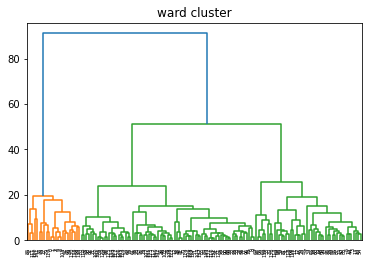

In [93]:
from scipy.cluster.hierarchy import linkage, dendrogram 

mergings_ward=linkage(most_expressed.drop(['Sum Normal','Sum Tumor','Mean Normal','Mean Tumor','STD Normal','STD Tumor','p-value','adjusted-p-value'],axis=1),method="ward")
dendrogram(mergings_ward)
plt.title("ward cluster")
plt.show()

# Part 3B: Create a Heat Map 
A heatmap is a plotting method shows the different levels of some feature for each value being plotted through various shades of color. In my case, I am showing the different levels of gene expression in the top 5 most differentially expressed genes. I chose the color map "cool warm" where blue represents low levels of gene expression and red represents high levels of gene expression. On the x-axis, the 5 boxes on the left side represent patients with normal breast tissue and the 5 boxes on the right represent patients with tumor breast tissue. 

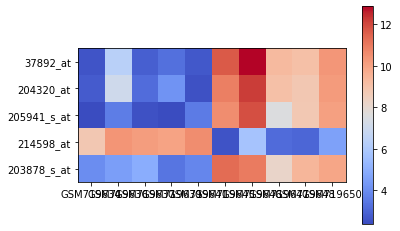

In [94]:
#define index for the dataframe
idx=['37892_at','204320_at','205941_s_at','214598_at','203878_s_at']

#define columns for the dataframe
cols=['GSM719634','GSM719636','GSM719637','GSM719639','GSM719641','GSM719645','GSM719646','GSM719647','GSM719648','GSM719650']

#convert data into dataframe
df=pd.DataFrame(most_expressed.drop(['Sum Normal','Sum Tumor','Mean Normal','Mean Tumor','STD Normal','STD Tumor','p-value','adjusted-p-value'],axis=1),columns=cols,index=idx)

#display dataframe as a heatmap 
#with diverging colourmap as coolwarm
plt.imshow(df,cmap='coolwarm')

#display a colorbar to understand which color represnts which range of data
plt.colorbar()
#assigning labels of x-axis according to dataframe
plt.xticks(range(len(df.columns)),df.columns)

#assigning labels of y-axis according to dataframe
plt.yticks(range(len(df.index)),df.index)
#display the figure
plt.show()

# Part 4: Analysis of the Results 

The final results of RNA seq analysis computed a p-value based off the gene expression levels which represented a measure of the probability that the observed difference in gene expression levels was due to random chance. There were 5 gene probes with significantly low p-values, this indicates that the difference in gene expression levels was not due to random chance and plays an important role in activating or inhibiting breast cancer tumor development: COL11A1, COL10A1, CLDN8, MMP11. It is important to note that two of the gene probes (37892_at and 204320_at) both represented the gene COL11A1. These genes were then used to generate a hierarchical clustering map. This plot generated two different clusters shown in orange and in green. Within the green cluster there are two mini-clusters that shows that these genes are closely related to eachother but share a more distant common ancestor. A heatmap was also generated from the top 5 differentially expressed genes. These results are most important for supporting my hypothesis because it shows the how the levels or expression vary between patients with normal breast tissue and patients with breast cancer tissue. From this I can conclude that genes COL11A1, COL10A1 and MMP11 are expressed higher in middle eastern women ages >55 who have breast cancer tumor tissue compared to normal tissue. In addition, I found that the gene CLDN8 is actually expressed lower in middle eastern women ages >55 who have breast cancer tumor tissue compared to normal tissue. Thus, my hypothesis was correct in that the genes COL11A1, COL10A1 and MMP11 would be upregulated, however, I was wrong in my hypothesis that CLDN8 gene would be upregulated in breast cancer tissue when it was actually downregulated. 
I also performed pairwise sequence analysis just to see how the top most differentially expressed gene (COl11A1) nucleotide sequence compared in humans and chimpanzees. These results marked which bases were different with a - and computed a score of +44/87 nucleotides which indicates that about 50% of the bases within the Col11A1 gene were similiar between the two species. 